# Read cnn training history files and plot

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.preprocessing import LabelEncoder

In [2]:
# for converting strings of label from one division to another, e.g. fam/subfam to critter name
def convert_labels(labels, meta_file, from_division, to_division):
    # find label in labels in meta_file under column from_division
    # append as key in dictionary lookup_table, append as value the corresponding label in to_division

    df = pd.read_csv(meta_file, usecols=[from_division, to_division])
    lookup_table = dict() # look up table for new label
    for label in labels:
        if label in lookup_table.keys():
            continue
        idx = df.loc[df[from_division]==label].index[0]
        lookup_table[label] = df[to_division][idx]
    return [lookup_table[label] for label in labels]

In [3]:
def plot_hist(history):
    history_dict = history.history
    epochs=len(list(history_dict.values())[0])
    plt.figure(figsize = (4, 3))
    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

    plt.figure(figsize = (4, 3))
    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

In [4]:
def plot_confusion(true_class, pred_class):
    labels = (np.unique(true_class))
    conf_mat = confusion_matrix(true_class, pred_class)#, labels=labels)
    disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
    disp.plot(xticks_rotation='vertical')
    plt.show()
    accuracy = np.diagonal(conf_mat).sum()/np.sum(conf_mat)
    print('accuracy =', accuracy)

## Read history by epoch and pred/true labels for confusion matrix

In [ ]:
# Getting back the objects:
with open('E:/chirpfiles/hist_mfcc_c_c_twohiddenlayer_64_128_5sec_critter.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    train_history = pickle.load(f)

In [7]:
with open('E:/chirpfiles/test_set_mfcc_c_c_twohiddenlayer_64_128_5sec_critter.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    [true_class, pred_class] = pickle.load(f)

In [ ]:
plot_hist(train_history)

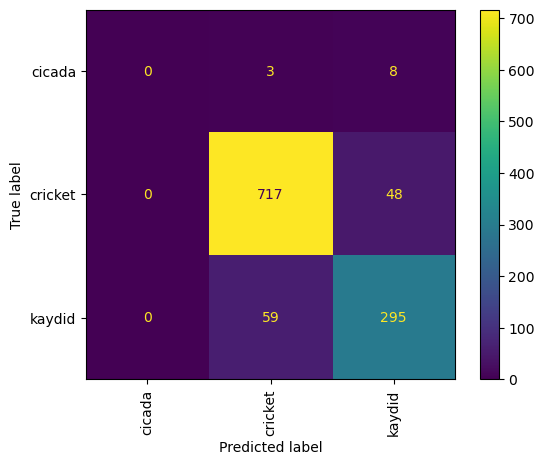

accuracy = 0.8955752212389381


In [8]:
plot_confusion(true_class, pred_class)

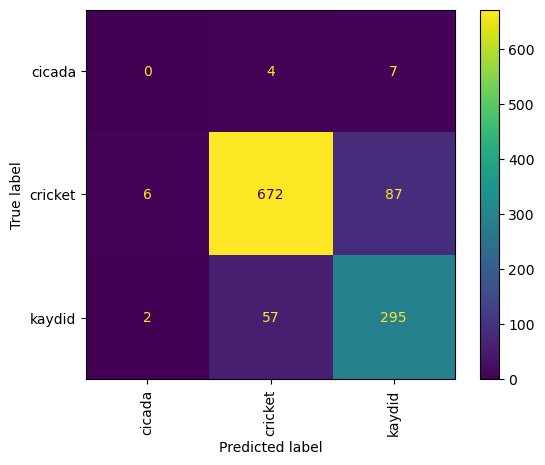

accuracy = 0.8557522123893805


In [6]:
short_true_label = convert_labels(true_class, 'MLNS_05302024.csv', 
                                  'fam_or_subfam', 'critter_name')
short_pred_label = convert_labels(pred_class, 'MLNS_05302024.csv', 
                                  'fam_or_subfam', 'critter_name')
plot_confusion(short_true_label, short_pred_label)